В данной задаче необходимо определить по кореллирующим признакам пассажира значение целевого признака выжил он или нет. Для этого необходимо построить модель классификации. Обучение модели для нахождения решающей функции производится на основе данных обучающей выборки. Затем модель тестируется с помощью тестовой выборки. Обучающую и тестовую выборки необходимо сделать качественными, убрав повторяющиеся, пустые, а также неудобные для работы данные. 
Для начала рассмотрим алгоритм для создания модели машинного обучения:
1. Импортируем данные
2. Обрабатываем данные (извлекаем из данных полезную информацию)
3. Выделяем признаки на которых будет проходить обучение из обработанных данных
4. Выбор и обучение модели на основе полученных признаков
5. Подбор лучшей модели


В первую очередь импортируем необходимые библиотеки:

In [1]:
#библиотека pandas используется для работы с данными
#библиотека numpy используется для математических вычислений

import numpy as np
import pandas as pd


In [2]:
#Библиотеки необходимые для визуализации данных

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

С помощью функции pd.read_csv считываем данные обучающей и тестовой выборок по ссылкам и присваиваем их переменным train и test в виде датафрейма (таблицы)

с помощью функции head выведем признаки первых 10 пассажиров

In [3]:
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Набор данных включает в себя такие признаки, как номер пассажира, значение выжил/не выжил, класс, имя, пол, количество братьев/сестер/супругов, количество родителей/детей,номер билета, стоимость проезда, каюта и порт посадки

Построим зависимости выживаемости от разных признаков, чтобы увидеть как они коррелируют

**Зависимость выживаемости от пола:**

Процент выживших женщин: 74.20382165605095
Процент выживших мужчин: 18.890814558058924


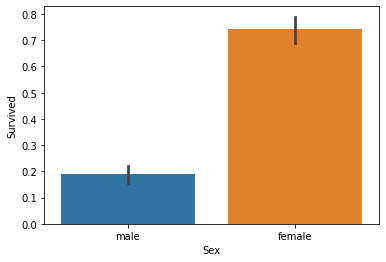

In [4]:
#Построим диаграмму зависимости выживаемости от пола
sns.barplot(x="Sex", y="Survived", data=train)

#Найдем процент выживших женщин и мужчин
print("Процент выживших женщин:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Процент выживших мужчин:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

**Зависимость выживаемости от возраста пассажиров:**

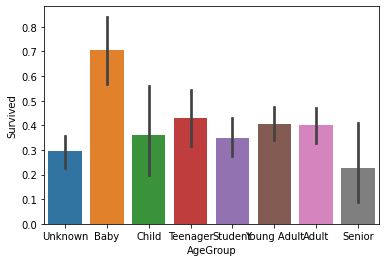

In [5]:
#Так как значений возраста достаточно много разделим их на категории, пропущенные данные заменим с помощью метода fillna на значения -0.5
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
#создадим массивы с необходимыми категориями и их обозначениями на графике, выжившие пассажиры с неизвестным возрастом попадают в первый диапазон
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
#разделим исходные таблицы с данными на заданные промежутки с помощью функции cut
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#Построим диаграмму зависимости выживаемости от категории возрастов
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

**Зависимость выживаемости от класса пассажиров:**

Процент выживших пассажиров 1го класса: 62.96296296296296
Процент выживших пассажиров 2го класса: 47.28260869565217
Процент выживших пассажиров 3го класса: 24.236252545824847


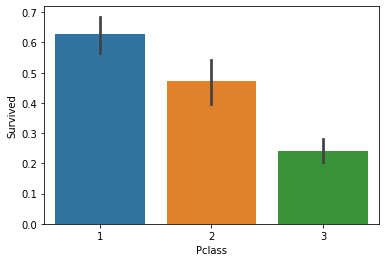

In [6]:
#Построим диаграмму зависимости выживаемости от класса пассажиров
sns.barplot(x="Pclass", y="Survived", data=train)

#Найдем процент выживших разных классов
print("Процент выживших пассажиров 1го класса:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Процент выживших пассажиров 2го класса:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Процент выживших пассажиров 3го класса:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

**Зависимость выживаемости при наличии братьев/сестер/супругов:**

Процент выживших без родственников: 34.53947368421053
Процент выживших с 1 родственником: 53.588516746411486
Процент выживших с 2 родственниками: 46.42857142857143
Процент выживших с 3 родственниками: 25.0
Процент выживших с 4 родственниками: 16.666666666666664


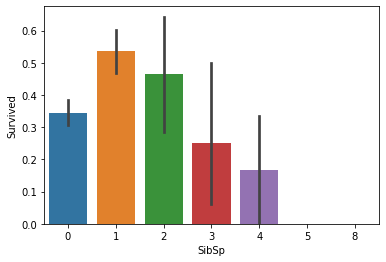

In [7]:
#Построим диаграмму зависимости выживаемости от наличия родственников
sns.barplot(x="SibSp", y="Survived", data=train)

#Возьмем максимальное значение в 4 родственника и найдем их процент
print("Процент выживших без родственников:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Процент выживших с 1 родственником:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Процент выживших с 2 родственниками:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

print("Процент выживших с 3 родственниками:", train["Survived"][train["SibSp"] == 3].value_counts(normalize = True)[1]*100)

print("Процент выживших с 4 родственниками:", train["Survived"][train["SibSp"] == 4].value_counts(normalize = True)[1]*100)


**Зависимость выживаемости при наличии родителей/детей:**

Процент выживших без родителей/детей: 34.365781710914455
Процент выживших с 1 родителем/ребенком: 55.08474576271186
Процент выживших с 2 родителями/детьми: 50.0
Процент выживших с 3 детьми: 60.0
Процент выживших с 5 детьми: 20.0


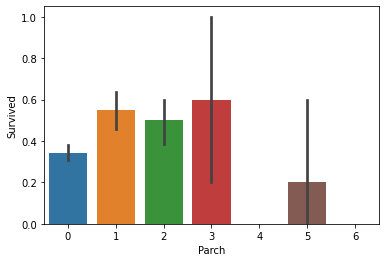

In [8]:
#Построим диаграмму зависимости выживаемости от наличия родителей/детей
sns.barplot(x="Parch", y="Survived", data=train)

#найдем процент выживших пассажиров с родителями/детьми
print("Процент выживших без родителей/детей:", train["Survived"][train["Parch"] == 0].value_counts(normalize = True)[1]*100)

print("Процент выживших с 1 родителем/ребенком:", train["Survived"][train["Parch"] == 1].value_counts(normalize = True)[1]*100)

print("Процент выживших с 2 родителями/детьми:", train["Survived"][train["Parch"] == 2].value_counts(normalize = True)[1]*100)

print("Процент выживших с 3 детьми:", train["Survived"][train["Parch"] == 3].value_counts(normalize = True)[1]*100)

print("Процент выживших с 5 детьми:", train["Survived"][train["Parch"] == 5].value_counts(normalize = True)[1]*100)


**Зависимость выживаемости от наличия номера каюты:**

Процент выживших пассажиров с записанным номером каюты: 66.66666666666666
Процент выживших пассажиров без записанного номера каюты: 29.985443959243085


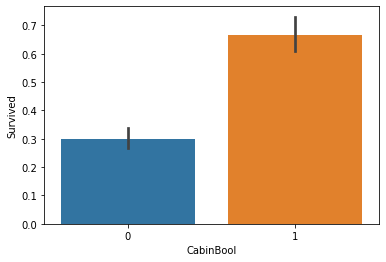

In [9]:
#Представим тех пассажиров, у которых был записан номер каюты в виде 1, тех у кого не было останется значение 0
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#найдем процент выживших пассажиров
print("Процент выживших пассажиров с записанным номером каюты:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Процент выживших пассажиров без записанного номера каюты:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

#Построим диаграмму зависимости выживаемости от наличия номера каюты в списках
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

Отсюда делаем вывод, что выживаемость гораздо выше у женщин, чем у мужчин. У детей в возрасте до 5 лет самый высокий шанс на выживание. Также сильно влияет социально-экономическое положение пассажира (класс), наибольший шанс выжить у 1го класса пассажиров. Самый высокий шанс выжить при наличие 1 родственника, при наличие 1-2 родственников шанс выжить больше, чем без них, при наличие 3 и более родственников шанс выжить меньше, чем с 1-2 или без них. Люди, у которых на борту 1-3 родителя/ребенка имеют шанс выживания намного выше, чем те у кого их больше. При отсутствии детей/родителей, шанс выжить меньше, чем при наличие 1-3 родителя/ребенка. Также у людей с записанными номерами кают шанс выжить намного выше чем у тех, у кого он не известен/не записан.

Рассмотрим данные обучающей выборки на предмет качества.

Функцией describe выводим статистические характеристики данных

In [10]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,204,889,891,891.000000
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,8,NaN
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,Young Adult,NaN
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,220,NaN
mean,446.000000,0.383838,2.308642,NaN,NaN,23.699966,0.523008,0.381594,NaN,32.204208,NaN,NaN,NaN,0.228956
std,257.353842,0.486592,0.836071,NaN,NaN,17.731181,1.102743,0.806057,NaN,49.693429,NaN,NaN,NaN,0.420397
min,1.000000,0.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,NaN,6.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,0.000000


In [11]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [12]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
CabinBool        0
dtype: int64


In [13]:
print(pd.isnull(test).sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
AgeGroup         0
CabinBool        0
dtype: int64


Такие данные, как возраст, стоимость проезда, количество братьев/сестер/супругов, количество родителей/детей относятся к количественным признакам.

выжил/не выжил, класс пассажира, пол, порт посадки относятся к категориальным признакам.

Номер билета, каюта, имя, порт посадки и пол являются строковыми данными. Также значения стоимости проезда и возраста принимают значения float.

В обучающей выборке всего 891 пассажир, в тестовой 418. В обучающей выборке отсутствуют значения порта отправки. Как и в обучающей, так и в тестовой выборках отсутствуют значения возрастных признаков, также отсутствуют значения номеров кают. Так как пропусков в возрастных признаках не очень много, то лучшим решением будет найти алгоритм для их замены значениями. Номеров кают наоборот, отсутствует очень большое количество, поэтому заполнить значения чем-либо будет затруднительно и проще всего вовсе удалить признак из набора данных.

Многие методы машинного анализа работают только с числовыми данными. Поэтому необходимо привести нечисловые параметры к числовым.

Для начала удалим номер каюты и номер билета из двух выборок, потому что эти данные не являются качественными

In [14]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [15]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

Определим количество людей с каждого порта для обучающей выборки и заменим пропуски значением самого используемого.

In [16]:
print("Порт southampton:")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Порт cherbourg:")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Порт queenstown:")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Порт southampton:
644
Порт cherbourg:
168
Порт queenstown:
77


In [17]:
#Функцией fillna заменяем пустые строки значением порта southampton
train = train.fillna({"Embarked": "S"})

Найдем метод предсказания возрастного признака для недостающих значений

In [18]:
#Создадим обьединенную выборку
combine = [train, test]

#определим титул к каждому имени пассажира и выведем их
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#функция crosstab выводит частоту появления данных
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [19]:
#обьеденим титулы в более общий вид
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [20]:
#Каждому титулу поставим в соответствие номер
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
#заменим эти номера в выборке вместо самих титулов с помощью функции map
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [21]:
#значения возрастного признака для каждого титула рассчитаем через средние значения возрастной категории, созданной ранее
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult
#соотнесем значения титула в виде номера с возрастной категорией
age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}
#заменим пропуски в серии возрастных категорий соответствующими категориями найденными через титулы
for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [22]:
#заменим каждую возрастную категорию соответствующим номером
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

#так как мы уже нашли пропуски в возрастном признаке, создав признак возрастной категории и подобрав для него значения, то возрастной признак удалим за ненадобностью
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [23]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,7.2500,S,4.0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,71.2833,C,6.0,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,7.9250,S,5.0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,53.1000,S,5.0,1,3
4,5,0,3,"Allen, Mr. William Henry",male,0,0,8.0500,S,5.0,0,1
5,6,0,3,"Moran, Mr. James",male,0,0,8.4583,Q,5.0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,51.8625,S,6.0,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,21.0750,S,1.0,0,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,11.1333,S,5.0,0,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,30.0708,C,3.0,0,3


In [24]:
print(pd.isnull(test).sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Fare           1
Embarked       0
AgeGroup       0
CabinBool      0
Title          0
dtype: int64


Так как признак имени больше не представляет качественные данные, то можно его удалить

In [25]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

Заменим строковые значения пола числовыми 0 для мужчин и 1 для женщин. Также строковые значения портов посадки заменим на числовые.

In [26]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

In [27]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

Для признака стоимость проезда вставим попущенное значение, а также разделим все цены на 4 группы по величине

In [28]:
#Заменим пропущенное значение на среднее значение стоимости проезда для соответствующего класса пассажира
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] 
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        
#Разделим значения признака стоимость проезда типа float на 4 группы и создадим для них отдельную серию в выборке
train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])

#удалим серии стоимости проезда
train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

Проверим данные на качество

In [29]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2
5,6,0,3,0,0,0,3,5.0,0,1,2
6,7,0,1,0,0,0,1,6.0,1,1,4
7,8,0,3,0,3,1,1,1.0,0,4,3
8,9,1,3,1,0,2,1,5.0,0,3,2
9,10,1,2,1,1,0,2,3.0,0,3,3


In [30]:
test.head(10)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2
5,897,3,0,0,0,1,3.0,0,1,2
6,898,3,1,0,0,3,5.0,0,2,1
7,899,2,0,1,1,1,5.0,0,1,3
8,900,3,1,0,0,2,3.0,0,3,1
9,901,3,0,2,0,1,4.0,0,1,3


Построим модели классификации с помощью библиотеки sklearn. Для сравнения построим модель дерева решений, модель случайных лесов и модель knn (k ближайших соседей). Для проверки точности модели необходимо использовать часть обучающих данных. Оптимальное соотношение 0,7 на 0,3.

In [31]:
#Импортируем библиотеки для построения моделей и расчета точности модели
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#формируем данные для обучения модели и целевой признак из обучающей выборки
predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
#с помощью функции train_test_split разбиваем данные x и y в указанной выше пропорции и присваиваем переменным x_train, x_val, y_train, y_val
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.3, random_state = 0)

In [32]:
# Дерево решений
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
#находим предсказанное значение признака, а также определяем точность модели сравнением полученных предсказанных правильных ответов со всеми ответами
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.22


In [33]:
# Случайные леса
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.21


In [34]:
# метод K ближайших соседей
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

84.7


Наиболее точным методом предсказания оказался метод K ближайших соседей. Используем его для создания выходного файла

In [35]:
#присваиваем переменной ids значение номера пассажира и вычисляем предсказание ответа
ids = test['PassengerId']
predictions = knn.predict(test.drop('PassengerId', axis=1))
#Представляем выходные данные в виде таблицы и конвертируем в csv файл
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)